<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-07-12 11:53:16--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-07-12 11:53:17 (37.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# Load the data
data = pd.read_csv("moore.csv", header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

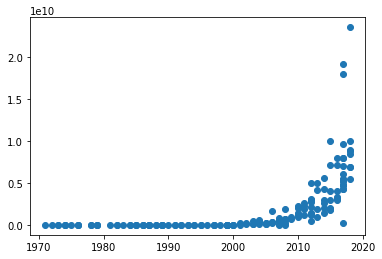

In [5]:
# Plot the data
plt.scatter(X, Y)

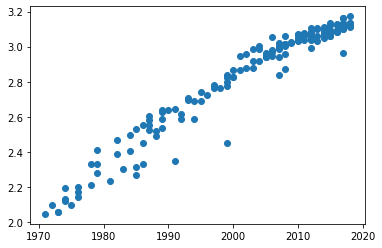

In [7]:
# Take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [8]:
# Let's center the X data, so the values are not too large
X = X - X.mean()

In [12]:
# Now create a TF model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss="mse")

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 129.0431 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 94.2723 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 157.7845 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 144.5423 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 67.2897 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 62.3725 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 36.8038 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 27.3100 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 23.0675 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 17.3457 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 10.7

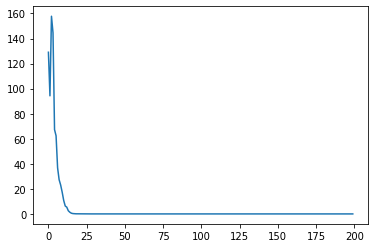

In [13]:
# Plot the loss
plt.plot(r.history["loss"], label="loss")

In [15]:
# Get the slope of the line
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.02320485]], dtype=float32), array([2.8328257], dtype=float32)]


In [16]:
# The slope of the line is:
a = model.layers[0].get_weigths()[0][0, 0]

AttributeError: ignored